In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [2]:
full_data = pd.read_csv('dataset/application_record.csv')
status_data = pd.read_csv('dataset/credit_record.csv')

print(full_data.shape)
print(status_data.shape)

(438557, 18)
(1048575, 3)


In [3]:
full_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
status_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


**MONTHS_BALANCE**	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

<br>

**STATUS**	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Create the target variable

In [5]:
month_begin = status_data.groupby(['ID'])['MONTHS_BALANCE'].min().reset_index()
month_begin = month_begin.rename(columns={'MONTHS_BALANCE':'ACCT_AGE'})
month_begin.head()

,ID,ACCT_AGE
0,5001711,-3
1,5001712,-18
2,5001713,-21
3,5001714,-14
4,5001715,-59


In [6]:
full_data_merge_age = full_data.merge(month_begin, on = 'ID', how = 'left')
print(full_data_merge_age.shape)
full_data_merge_age.head()

(438557, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCT_AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [7]:
status_data.STATUS.unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [8]:
# if status is not (X or C,0,1), it is past due
# if x and c is not high risk else yes

status_data['dep_value'] = status_data.STATUS.apply(lambda x: None if x == 'X' or x == 'C' or x == '0' or x == '1'else 'Y')
status_data['dep_value'].unique()

array([None, 'Y'], dtype=object)

In [9]:
target_df = status_data.groupby(['ID']).count().reset_index()
target_df = target_df.rename(columns = {'dep_value':'HIGH_RISK'})
target_df['HIGH_RISK'] = target_df.HIGH_RISK.apply(lambda x: 0 if x == 0 else 1)
target_df.head()


,ID,MONTHS_BALANCE,STATUS,HIGH_RISK
0,5001711,4,4,0
1,5001712,19,19,0
2,5001713,22,22,0
3,5001714,15,15,0
4,5001715,60,60,0


In [10]:
full_data_merge_age_risk = full_data_merge_age.merge(target_df[['ID','HIGH_RISK']], how = 'inner', on = 'ID')
full_data_merge_age_risk.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCT_AGE,HIGH_RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


# EDA

In [11]:
full_data_merge_age_risk.iloc[:,1:].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,ACCT_AGE,HIGH_RISK
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


## value counts nd frequency of each observation within a feature

In [12]:
def value_cnt_norm(df,feature):
    
    fv_cnt = df[feature].value_counts()
    fv_cnt_norm = df[feature].value_counts(normalize=True)*100
    fv_cnt_df = pd.concat([fv_cnt,fv_cnt_norm], axis = 1)

    fv_cnt_df.columns = [f'{feature}_CNT','FREQUENCY']
    return fv_cnt_df

In [13]:
[value_cnt_norm(full_data_merge_age_risk,i) for i in full_data_merge_age_risk.columns if i != 'ID' ]

[   CODE_GENDER_CNT  FREQUENCY
 F            24430  67.010451
 M            12027  32.989549,
    FLAG_OWN_CAR_CNT  FREQUENCY
 N             22614   62.02924
 Y             13843   37.97076,
    FLAG_OWN_REALTY_CNT  FREQUENCY
 Y                24506  67.218915
 N                11951  32.781085,
     CNT_CHILDREN_CNT  FREQUENCY
 0              25201  69.125271
 1               7492  20.550237
 2               3256   8.931069
 3                419   1.149299
 4                 63   0.172806
 5                 20   0.054859
 14                 3   0.008229
 7                  2   0.005486
 19                 1   0.002743,
           AMT_INCOME_TOTAL_CNT  FREQUENCY
 135000.0                  4309  11.819404
 180000.0                  3097   8.494939
 157500.0                  3089   8.472996
 112500.0                  2956   8.108182
 225000.0                  2926   8.025894
 ...                        ...        ...
 177750.0                     1   0.002743
 594000.0                   

<h1 style="color:darkred">NOTE</h1>

<ul>
    <li> DAYS_BIRTH	Birthday	Count backwards from current day (0), -1 means yesterday</li>
    <li>DAYS_EMPLOYED	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.</li>
 </ul>

In [14]:
full_data_merge_age_risk['DAYS_EMPLOYED'] = full_data_merge_age_risk['DAYS_EMPLOYED'].apply(lambda x: np.abs(x)/365.25 if x < 0 else 0)
full_data_merge_age_risk['DAYS_EMPLOYED'].head()

0    12.435318
1    12.435318
2     3.104723
3     8.353183
4     8.353183
Name: DAYS_EMPLOYED, dtype: float64

# create an employment distribution but ignore retired and unemployed client

Text(0.5, 1.0, 'Days Employment Distribution')

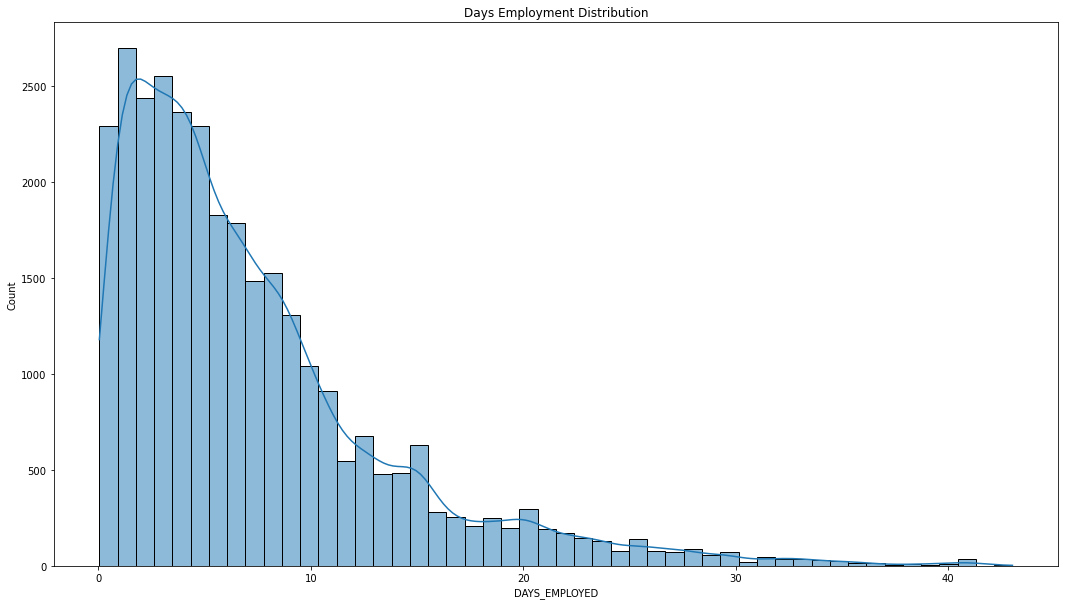

In [23]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(np.abs(full_data_merge_age_risk[full_data_merge_age_risk['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED']),bins = 50, kde = True)
plt.title('Days Employment Distribution')

Text(0.5, 1.0, 'High VS LOW risk group by Day of Employment')

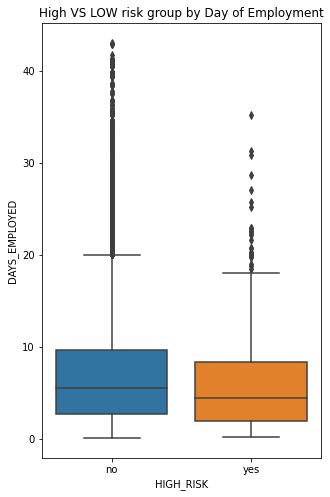

In [29]:
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(y=full_data_merge_age_risk[full_data_merge_age_risk['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'],\
            x=full_data_merge_age_risk[full_data_merge_age_risk['DAYS_EMPLOYED'] > 0]['HIGH_RISK'])
plt.xticks(ticks=[0,1], labels=['no','yes'])
plt.title('High VS LOW risk group by Day of Employment')
plt.show

In [16]:
end

NameError: name 'end' is not defined

In [ ]:
full_data_merge_age_risk['DAYS_BIRTH'] = full_data_merge_age_risk['DAYS_BIRTH'].apply(lambda x: np.abs(x)/365.25 if x < 0 else 0)
full_data_merge_age_risk['DAYS_BIRTH'].head()

# Bracket AMT income


In [ ]:
print('\033[93m')
print('The lowest income: ${}\nThe median income: ${}\nThe highest income: ${}'\
      .format(full_data_merge_age_risk['AMT_INCOME_TOTAL'].min(),\
             full_data_merge_age_risk['AMT_INCOME_TOTAL'].mean(),\
             full_data_merge_age_risk['AMT_INCOME_TOTAL'].max()))

In [ ]:
print('\033[92m')

print('''I decide to bracket the amt income into 4 brackets:\033[93m \n\033[1m1st bracket:\033[0m \033[93m{} records which is the group of customer who earned income from ${} to $100,000\n\033[1m2nd bracket:\033[0m \033[93m{} records which is the group of customer who earned income from $100,000 to $200,000\n\033[1m3rd bracket:\033[0m \033[93m{} records which is the group of customer who earned income from $200,000 to $400,000\n\033[1m4th bracket:\033[0m \033[93m{} records which is the group of customer who earned income more than $400,000'''\
      .format(full_data_merge_age_risk[full_data_merge_age_risk['AMT_INCOME_TOTAL'] < 100000].shape[0],
              full_data_merge_age_risk['AMT_INCOME_TOTAL'].min(),
              full_data_merge_age_risk.query('AMT_INCOME_TOTAL >= 100000 & AMT_INCOME_TOTAL < 200000').shape[0],
              full_data_merge_age_risk.query('AMT_INCOME_TOTAL >= 200000 & AMT_INCOME_TOTAL < 400000').shape[0],
              full_data_merge_age_risk.query('AMT_INCOME_TOTAL >= 400000').shape[0]))

In [ ]:
full_data_merge_age_risk['AMT_INCOME_TOTAL'] = np.where(full_data_merge_age_risk['AMT_INCOME_TOTAL'] < 100000,1,\
         np.where((full_data_merge_age_risk['AMT_INCOME_TOTAL'] >= 100000)& \
                  (full_data_merge_age_risk['AMT_INCOME_TOTAL'] < 200000),2,\
                  np.where((full_data_merge_age_risk['AMT_INCOME_TOTAL'] >= 200000)& \
                  (full_data_merge_age_risk['AMT_INCOME_TOTAL'] < 400000),3,4)))

In [ ]:
full_data_merge_age_risk['AMT_INCOME_TOTAL'].value_counts()

In [ ]:
value_cnt_norm(full_data_merge_age_risk,'AMT_INCOME_TOTAL')

In [ ]:
#Birthdate

In [ ]:
# day employ

# convert value of these columns to categorical 


CODE_GENDER_CNT  FREQUENCY
 F            24430  67.010451
 M            12027  32.989549,
    FLAG_OWN_CAR_CNT  FREQUENCY
 N             22614   62.02924
 Y             13843   37.97076,
    FLAG_OWN_REALTY_CNT  FREQUENCY
 Y                24506  67.218915
 N                11951  32.7

In [ ]:
full_data_merge_age_risk['CODE_GENDER'] = full_data_merge_age_risk['CODE_GENDER'].apply(lambda x: 1 if x == 'F' else 0)
full_data_merge_age_risk['FLAG_OWN_CAR'] = full_data_merge_age_risk['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)

full_data_merge_age_risk['FLAG_OWN_REALTY'] = full_data_merge_age_risk['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)


### Change NAME_EDUCATION_TYPE	object	to ordinal


In [ ]:
print(full_data_merge_age_risk['NAME_EDUCATION_TYPE'].value_counts())

In [ ]:
full_data_merge_age_risk['NAME_EDUCATION_TYPE'] = np.where(full_data_merge_age_risk['NAME_EDUCATION_TYPE'] == "Lower secondary",0,\
        np.where(full_data_merge_age_risk['NAME_EDUCATION_TYPE'] == "Secondary / secondary special",1,\
                np.where(full_data_merge_age_risk['NAME_EDUCATION_TYPE'] == "Incomplete higher",2,4)))

print(full_data_merge_age_risk['NAME_EDUCATION_TYPE'].value_counts())

NAME_INCOME_TYPE	object	36457	5	0	0.00


In [ ]:
print(full_data_merge_age_risk['NAME_INCOME_TYPE'].value_counts())

8	NAME_FAMILY_STATUS	object	36457	5	0	0.00


In [ ]:
print(full_data_merge_age_risk['NAME_FAMILY_STATUS'].value_counts())

9	NAME_HOUSING_TYPE

In [ ]:
print(full_data_merge_age_risk['NAME_HOUSING_TYPE'].value_counts())

## convert these cols to categorical 

['NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS']

In [ ]:
oh_col = ['NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS']

one_hot_df = pd.get_dummies(full_data_merge_age_risk, columns = oh_col)
one_hot_df.head()


# check if there are any missing values

In [ ]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

show_missing(full_data_merge_age_risk)

In [ ]:
full_data_merge_age_risk.OCCUPATION_TYPE.value_counts()


In [ ]:
# since OCCUPATION_TYPE miss value contains 31% of the dataframe
# I decide to drop this column
drop_col = ['OCCUPATION_TYPE']
df2 =one_hot_df.drop(columns = drop_col)
df2.shape

# Split train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1],\
                                                    df2[['HIGH_RISK']],\
                                                    test_size = 0.2, random_state = 42)

In [ ]:
train_df = pd.concat([X_train,y_train], axis = 1)
test_df = pd.concat([X_test,y_test], axis = 1)
train_df.to_csv('dataset/cc_train.csv', index = False)
test_df.to_csv('dataset/cc_test.csv', index = False)
print('\033[94m')
print('*'*60)
print(f'There are {train_df.shape[1]} columns and {train_df.shape[0]} rows in Train set')
print(f'There are {test_df.shape[1]} columns and {test_df.shape[0]} rows in Test set')